In [1]:
# Import modules and useful libraries
import model, dataset, train, evaluation
from sklearn.model_selection import train_test_split
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader
import pandas as pd

In [2]:
# Set up different paths to read images and metadata
base_path_train = (
    "C:/Users/ibenn/Desktop/DSB/Year 2 HEC/Jimams-methanekiller/data/train_data/"
)
base_path_test = (
    "C:/Users/ibenn/Desktop/DSB/Year 2 HEC/Jimams-methanekiller/data/test_data/"
)
metadata_csv_path_train = "C:/Users/ibenn/Desktop/DSB/Year 2 HEC/Jimams-methanekiller/data/train_data/metadata.csv"
metadata_csv_path_test = "C:/Users/ibenn/Desktop/DSB/Year 2 HEC/Jimams-methanekiller/data/test_data/metadata.csv"

#### ResNet 18 Model Training

In [3]:
# Define our ResNet18 model
resnet18 = model.resnet18(freeze_parameters=True)

Using cache found in C:\Users\ibenn/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\ibenn\AppData\Local\pypoetry\Cache\virtualenvs\methane-killer-Qf5rJjK0-py3.11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ibenn\AppData\Local\pypoetry\Cache\virtualenvs\methane-killer-Qf5rJjK0-py3.11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# Get summary of model architecture
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Read metadata for training and testing datasets
metadata_train = pd.read_csv(metadata_csv_path_train)
metadata_test = pd.read_csv(metadata_csv_path_test)

# Split the training data into training and validation sets while maintaining class distribution
train_metadata, val_metadata = train_test_split(
    metadata_train, test_size=0.3, random_state=42, stratify=metadata_train["plume"]
)

# Create new instances of the TrainData class for training and validation, augment the training dataset
data_train_original = dataset.TrainData(
    metadata=train_metadata, base_path=base_path_train
)
data_train_hflip = dataset.TrainData(
    metadata=train_metadata,
    base_path=base_path_train,
    augmentation=transforms.RandomHorizontalFlip(p=1.0),
)
data_train_vflip = dataset.TrainData(
    metadata=train_metadata,
    base_path=base_path_train,
    augmentation=transforms.RandomVerticalFlip(p=1.0),
)
data_train_gblur = dataset.TrainData(
    metadata=train_metadata,
    base_path=base_path_train,
    augmentation=transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
)
data_train = ConcatDataset(
    [data_train_original, data_train_hflip, data_train_vflip, data_train_gblur]
)

data_validation = dataset.TrainData(
    metadata=val_metadata, base_path=base_path_train, augmentation=None
)

# Create new instance of the TestData class for testing
data_test = dataset.TestData(metadata=metadata_test, base_path=base_path_test)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Joseph Moussa/Desktop/X/4A/QB Hackathon/train_data/metadata.csv'

In [ ]:
# Define hyperparameters and loss function
epochs = 10
batch_size = 4
lr = 5e-04
loss_fn = nn.CrossEntropyLoss()

Total Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training Loss: 199.71592712402344
Validation Loss: 19.81121826171875
Model accuracy: 68.9922480620155 %
Epoch done.
-------------------------------------
Training Loss: 177.38681030273438
Validation Loss: 18.592618942260742
Model accuracy: 68.21705426356588 %
Epoch done.
-------------------------------------
Training Loss: 171.03407287597656
Validation Loss: 18.34562873840332
Model accuracy: 68.21705426356588 %
Epoch done.
-------------------------------------
Training Loss: 163.14952087402344
Validation Loss: 17.379568099975586
Model accuracy: 70.54263565891473 %
Epoch done.
-------------------------------------
Training Loss: 159.76535034179688
Validation Loss: 17.285724639892578
Model accuracy: 71.31782945736434 %
Epoch done.
-------------------------------------
Training Loss: 156.2239990234375
Validation Loss: 17.25458526611328
Model accuracy: 75.96899224806202 %
Epoch done.
-------------------------------------
Training Loss: 153.1461944580078
Validation Loss: 17.039669036865234


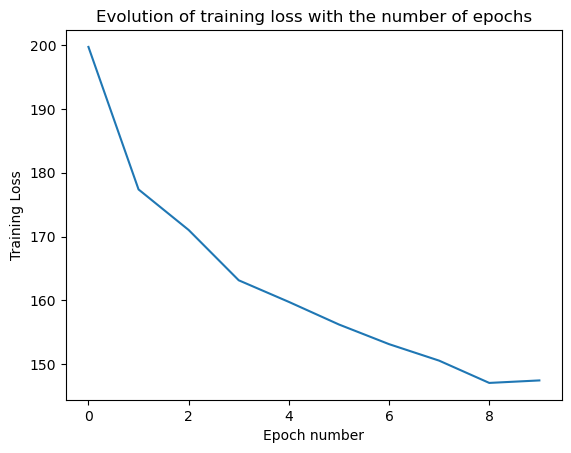

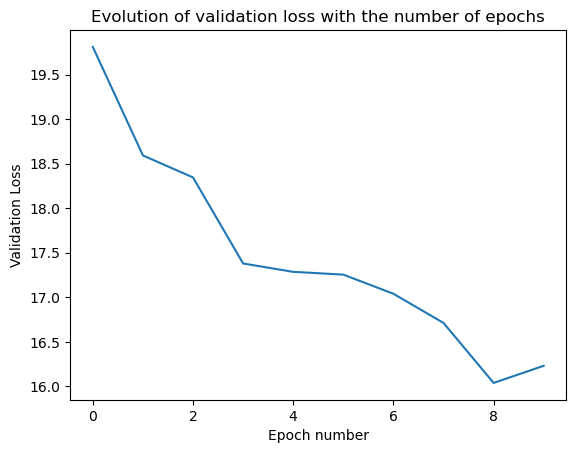

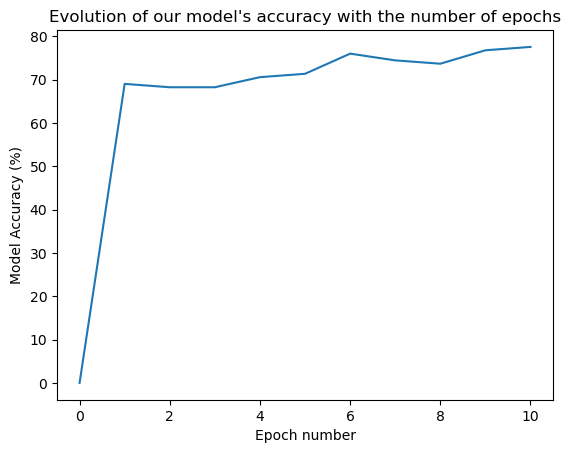

In [ ]:
# Train model
resnet18_trained = train.train(
    model=resnet18,
    data_train=data_train,
    data_validation=data_validation,
    loss_fn=loss_fn,
    lr=lr,
    epochs=epochs,
    batch_size=batch_size,
    print_progress=True,
)

#### Model Evaluation

Total Progress:   0%|          | 0/1204 [00:00<?, ?it/s]

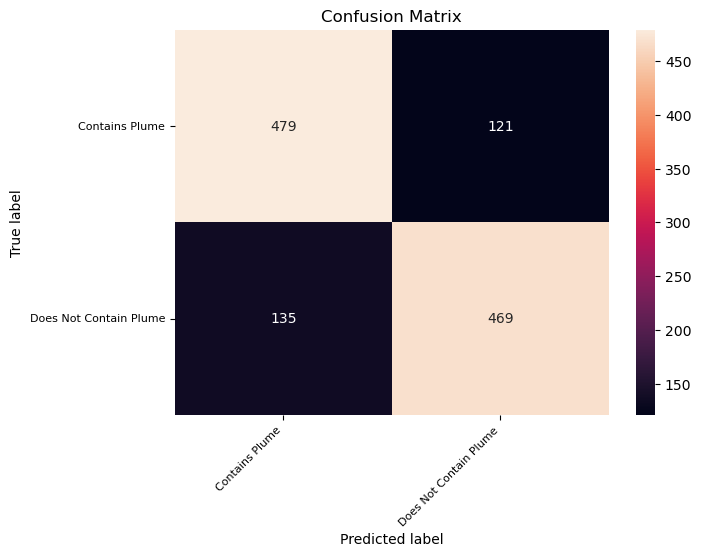

In [ ]:
# Compute and plot the confusion matrix on the training dataset
evaluation.conf_mat(model=resnet18_trained, test_data=data_train, batch_size=1)

Total Progress:   0%|          | 0/129 [00:00<?, ?it/s]

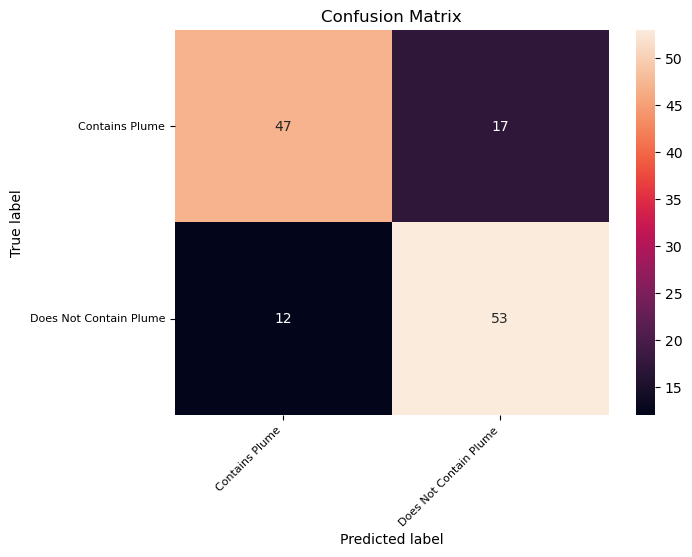

In [ ]:
# Compute and plot the confusion matrix on the validation dataset
evaluation.conf_mat(model=resnet18_trained, test_data=data_validation, batch_size=1)

In [ ]:
# Calculate AUC scores on training and validation datasets
auc_train_score = evaluation.calculate_auc(
    model=resnet18_trained, data=data_train, batch_size=1
)
auc_valid_score = evaluation.calculate_auc(
    model=resnet18_trained, data=data_validation, batch_size=1
)

print(f"AUC on the training dataset: {auc_train_score}")
print(f"AUC on the validation dataset: {auc_valid_score}")

Calculating AUC:   0%|          | 0/1204 [00:00<?, ?it/s]

Calculating AUC:   0%|          | 0/129 [00:00<?, ?it/s]

AUC on the training dataset: 0.86469646799117
AUC on the validation dataset: 0.8290865384615385


#### Output Generation

In [ ]:
resnet18.eval()

# Create a DataLoader for the test dataset
batch_size = 1
dataloader_test = DataLoader(data_test, batch_size=batch_size, shuffle=False)

# Initialize an empty list to store the model predictions
predictions = []

# Iterate through the test dataset and generate predictions
with torch.no_grad():
    for batch in dataloader_test:
        outputs = resnet18_trained(batch)
        class_probabilities = torch.sigmoid(outputs)
        probabilities_class_1 = class_probabilities[:, 1]
        predictions.extend(probabilities_class_1.numpy())

In [ ]:
# Store predictions in a dataframe
df_submission = pd.DataFrame()
df_submission["path"] = (
    data_test.metadata["date"].astype(str)
    + "_methane_mixing_ratio_"
    + data_test.metadata["id_coord"]
    + ".tif"
)
df_submission["label"] = predictions

In [ ]:
# Save model
torch.save(model.state_dict(), "resnet18.pth")

In [ ]:
# Save to CSV file
submissions_path = (
    "C:/Users/Joseph Moussa/Desktop/X/4A/QB Hackathon/data_aug_resnet18.csv"
)
df_submission.to_csv(submissions_path, index=False)